# CS51 Assignment 2: Algorithms and Simulation

## OVERVIEW


This assignment has two distinct parts in addition to a reflection: Part 1 requires you to apply your knowledge of algorithmic thinking and optimization and Part 2 allows you to demonstrate your modeling and coding skills by writing a numerical simulation. Material relevant for Part 1 will be covered in class during weeks 3-5, while material relevant for Part 2 will be covered in class during weeks 7 and 8. 


You'll notice several "*Optional Challenge*" problems throughout the assignment to challenge yourself. These will only be scored (4 or 5) if they are completed correctly with thorough explanation. If you attempt an optional challenge but do not succeed, you will not be penalized with a low score. Remember that you must include an explanation and interpretation for optional problems to be scored.


*This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously*.

## FORMAT

For optimal formatting, please use [Markdown and Code cells appropriately](https://drive.google.com/file/d/1RHoHCt_yWjOu7pGSCgPnLMJqY5H-w8Uf/view?usp=sharing) (more tips in this [Markdown cheatsheet](https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html)) and ensure ALL components of your work (including written analysis, images, tables, and code) are presented professionally. Anything marked as optional will only be scored if it is completed correctly. *Tip to avoid grammar and spelling errors*: do your writing using a program that is compatible with Grammarly, then copy your work into the notebook.

## HC GUIDELINES

You will be graded on the targeted HCs (#algorithms, #optimization, #modeling, #dataviz, #variables, #selfawareness) as indicated above in square brackets, at the discretion of the professor. "Footnotes" for these targeted HCs are not required. Please refer to the rubrics and your class notes as guidelines for these HCs. The optional challenges will only be given extra HC scores (4s or 5s) for correct and well-explained implementations that demonstrate deep knowledge.


If you believe that you have strong applications of other HCs, such as #estimation or #utility, please call this out. Doing so is an important part of reflecting on your learning. It should be an occasion for #selfawareness and #professionalism. However, since footnotes are not possible in Jupyter notebooks, simply provide the hashtag of the HC and a 1-3 sentence explanation of your application in a Markdown cell. Help the professor understand exactly why this constitutes a strong application. For guidelines on how to integrate HCs in your work and write meaningful footnotes, please see this guide, [Addressing HCs in your work](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit?usp=sharing), particularly section 3. For more samples of effective annotations, refer to the footnotes that go along with each HC example in the Outcome Index, written in square brackets.


## PART 1: OPTIMIZATION

For this section of the assignment, you will select one of the two scenarios below to describe how to optimize. You must complete all sections. [#optimization, potentially relevant: #modeling, #algorithms, #variables, #utility, #constraints]

1. *Scenario 1*: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2 and include a map of these cities (you may use an existing map or draw your own). 


2. *Scenario 2*: Suppose that a new virus is starting to spread, and many clinics do not have sophisticated diagnostic tools and must be able to determine whether or not a patient has this dangerous virus based solely on easily measured symptoms. You have been collecting information on symptoms (temperature, WBC count, headache severity, and cough severity) and you need to determine which patients have this new disease and which have only a milder illness. Plots that provide an overview of the data are available [here](https://drive.google.com/file/d/1td_jCTzYiOCMPJ8CwVSJU7u-pQ-5R1JW/view?usp=sharing). The data can be accessed at [this link](https://drive.google.com/file/d/1smz8OhVkIAbWVKpmkx7liE3bOWLfQch7/view?usp=sharing) (1 = Infected, 0 = Not infected).

#### 1.1 Optimization Problem: 
Choose a scenario from above. Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? (<150 words)

I chose scenario 2.
Objective function: Minimize error in disease diagnosis. The decision tree uses Gini impurity to determine splits so it can be also said to mimize that.
Decision variables: The splits in the tree (what variable is the tree split on, what value) and the shape of the tree.
Constraints: None

#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, and required steps. Name at least one other optimization technique that could be applied in this scenario and justify why you selected the technique you chose. Address whether your algorithm would lead to the global optimum. Hint: Some possible optimization algorithms that could be appropriate for this optimization problem were discussed in class.Optional but encouraged: Draw a flowchart to illustrate the process.  (<200 words)

I used a decision tree to classify patients into sick and not sick. I divided the dataset into training and test (using the traditional 80/20 split). This algorithm uses Gini splitting. In order to prevent overfitting, I required the tree to have a minimum of 4 sample to create a split. Other optimization algorithms that can be used incude logistical regression and k-means clustering. I chose to go with a decision tree because it works well with a small amount of data and it is very easy to understand how it works, since we can visualize the tree. An optimization tree only finds the local optimum, because it only chooses one option for each split without considering how accurate the other possibilities will be when additional splits are added.

In [87]:
'''
Decision tree for classifying virus infections
Adapted from https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/
'''

# importing required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random


# read the dataset
train_data = pd.read_csv('CS51_Assignment_Diagnosis_Data.csv')

#divide the dataset into train and test.
train_data = train_data.sample(frac=1, random_state=1) #shuffles the dataset, using the same random seed for reproducibility
test_data = train_data.iloc[0:20]
train_data = train_data.iloc[20:]
#test_data = pd.read_csv('CS51_virus_test.csv')

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Infected'],axis=1)
train_y = train_data['Infected']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Infected'],axis=1)
test_y = test_data['Infected']

'''
Create the object of the Decision Tree model
You can also add other parameters and test your code here
Some parameters are : max_depth and max_features
Documentation of sklearn DecisionTreeClassifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

 '''
model = DecisionTreeClassifier(min_samples_split=4)

# fit the model with the training data
model.fit(train_x,train_y)

# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


Shape of training data : (80, 5)
Shape of testing data : (20, 5)
Depth of the Decision Tree : 4
Target on train data [0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 0 1 0 0]
accuracy_score on train dataset :  0.9875
Target on test data [1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0]
accuracy_score on test dataset :  1.0


#### 1.3 Interpretation: 

Describe how the results of the optimization could be interpreted. What are the limitations of these interpretations? (<50 words)

The algorithm managed to get 100% accuracy in classifiying people (weirdly enough, sometimes the same model predicts one the datapoint differently and gets 95%. It manages to correctly classify all people in the test dataset to sick and not sick. This looks impressive, but we must take into account that: 1. Our test dataset is small, and thus the test accuracy has big uncertainty. In fact, with different seeds we get very different accuracies 2. Any biases in the dataset will be carried on to the algorithm. For example, if most infected patients in the dataset are men, and men have slightly lower body temperature, the algorithm might use that false indicator to determine who is sick or not. We want our dataset to be as broad and representative as possible.

## PART 2: SIMULATION

The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus) agent-based model in NS50 and will review it again in Week 7 of CS51. The following links will help you learn more about the SIR model: 

- An accessible [video](https://www.youtube.com/watch?v=XWXqXzAYe4E) introduction to the SIR model

- A [paper](http://op12no2.me/stuff/tjsir.pdf) that describes the SIR model and its numerical simulation

- A series of [educational lessons](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) on the SIR model


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate. If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease.

### 2.1 Numerical Modeling and Simulation

#### 2.1.1 Numerical Modeling: 
Describe the disease you selected to model and explain how you will set up the model of disease dynamics as a set of differential equations. Identify the relevant variables and explain what they mean in the context of your model. Explain how to select appropriate values for the relevant parameters, including the initial values. You're encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned estimation for any values that are difficult to justify with empirical data. Explain any assumptions of your model. [#modeling, #variables, and potentially #estimation]  (<150 words)

I selected to model COVID-19 (described as "Wuhan" in the spreadsheet, somewhat outdatedly). Since COVID has a significant incubation period, I added a terms to the equations to represent individuals who are infected but cannot yet spread the disease, called exposed. Since the disease is very new, estimating parameters is difficult. To deduce beta and lambda, I will use R0 estimates and the beta given is the spreadsheet to calculate recovery. While I do not believe there is evidence supporting that beta, I did not manage to find reliable data. Luckily, The R0 estimate is 3.28 (1) from [this](https://academic.oup.com/jtm/advance-article/doi/10.1093/jtm/taaa021/5735319#199702574) meta-analysis. Even if beta is not accurate, the final outcome should be the same, because I use R0 to calculate lambda, just the time scale will be different. Thus beta is 0.050065 and alpha = beta / R0 = 0.015264. The rate of exposed people becoming infected will be calculated as 1 / incubation period, which is equal to 5 (2). We will assume natural mortality rate is 0

#### 2.1.2 Numerical Simulation: 

Implement a numerical simulation to derive the implications of your model using Euler's method in Python. Include thorough comments in your code to convey your understanding of the implementation of Euler's method. [#algorithms]

***Optional Super Challenge***: Modify your code to add a layer of real-world complexity, such as:

- Vaccination

- Antibiotic use and/or development of antibiotic resistance

- Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).

Be sure to explain what you are doing, and add extra cells in the notebook as needed.

#### 2.1.3 Visualization: 

Create at least one relevant visualization of the disease dynamics. Include a descriptive figure legend. [#dataviz].

Text(0.5, 1.0, 'Projected spread of COVID-19')

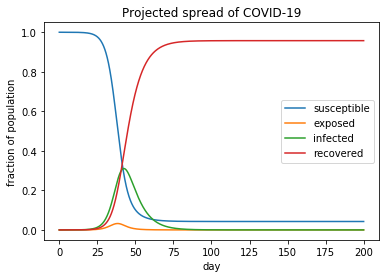

In [49]:
import matplotlib.pyplot as plt
import numpy

#define the starting point for the model. This configuration was chosen for its simplicity. 
#Infected people are an estimate of current global infected rate (03.05)
susceptible = [0.99998572]
exposed = [0]
infected = [0.00001428]
recovered = [0]

#set SEIR model parameters
infect = 0.050065 # rate of infection
recover = 0.015265 # rate of recovery
incubation_period = 5 # from https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext
infective = 1 / incubation_period # rate of exposed people becoming infectious
step_size = 0.1 # how many days are calculated in a step of the numerical estimation
days = 200 #time to run the model
steps = int(days / step_size)

#compute new values for susceptible, exposed, infected and recovered (respectively) population percents
for i in range(steps):
    s = susceptible[-1] - infect*infected[-1]*susceptible[-1]
    e = exposed[-1] + infect*infected[-1]*susceptible[-1] - infective*exposed[-1]
    i = infected[-1] + infective*exposed[-1] - recover * infected[-1]
    r = recovered[-1] + recover*infected[-1]
    susceptible.append(s)
    infected.append(i)
    exposed.append(e)
    recovered.append(r)
    
# Plot the results of the model
plt.plot(numpy.linspace(0, days, steps + 1), susceptible)
plt.plot(numpy.linspace(0, days, steps + 1), exposed)
plt.plot(numpy.linspace(0, days, steps + 1), infected)
plt.plot(numpy.linspace(0, days, steps + 1), recovered)
plt.legend(("susceptible", "exposed", "infected", "recovered"))
plt.xlabel("day")
plt.ylabel("fraction of population")
plt.title("Projected spread of COVID-19")

#### 2.1.4 SIR Model vs Numerical Simulation: 

What is the relationship between the SIR model differential equations and the numerical simulation you created? You may consider, for example, whether the model and simulation are continuous or discrete. You should also consider what it means to solve the SIR model and how your numerical simulation via Euler's method is helpful for this purpose. [#modeling] (<120 words)

The SIR model is a set of differential equations, so solving them means getting a function that shows, for example, infected rate as a function of time. Since we cannot do that analytically, we are using the euler method, which provides us with estimated solutions. Thus the simulation is discrete while the mathematical model is continuous, because we break it into steps. The weakness of our approach is that errors in the solution compound when more steps are calculated. Its strengh is how simple it is

#### 2.1.5 Numerical Results and Interpretation: 

Describe how the results of the numerical simulation can be interpreted, being sure to reference the output in the visualization. What insights can be gained from this simulation? What happened when you ran the model with varying parameter choices? What limitations does this simulation have? Note: To fully interpret the results, you should run the simulation multiple times with varying parameter inputs and observe the behavior of your model. [#modeling] (<120 words)

This model shows that most people in the world will be infected with coronavirus in the next two months, with the infected population peaking at around day 42. When changing the starting configuration, a similar pattern is seen but the time for everyone to get infected can vary. A lower infection rate causes the population to stabilize at a higher susceptible percent and take longer to stabilize, and if it is below the recovery rate the infection dies out. The incubation period only appears to slow the progression of the disease and heighten the equilibrium point by a bit. This model does not take into account efforts to fight coronavirus, prospective vaccines, geographical barriers, climate variation, etc. so it should not be taken too seriously

###  Agent-Based Modeling and Simulation

#### 2.2.1 Agent-Based Modeling: 

Use the [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus) model to simulate the spread of your selected disease. To do so, be sure to choose appropriate parameters for your selected disease and justify them. Provide a brief overview of this model, including a description of the algorithm that NetLogo uses for the simulation and the main assumptions involved. [#modeling, #variables] (<150 words)

Since the parameters of the NetLogo model are more abstract, they require more guessing. Recovery rate is the inverse of the mortality rate, estimated to be 2%. Right now around 2,500 out of 80,000 people are recovering each day in China (from [here](http://www.nhc.gov.cn/yjb/pzhgli/new_list.shtml)), so we will estimate recovery at 32 days or 5 week (rounding up because this is probably an underestimation because there haven't been many new infections so most of who is currently infected has been sick for some time). Since the model shows a rapid decline of the disease using this configuration, which does not fit real-world behavior, infectiousness will be set to the max, 99%. Population size is set to max (300), also to more closely match real world behavior

#### 2.2.2 Visualization: 

Select at least one informative visualization of the disease dynamics

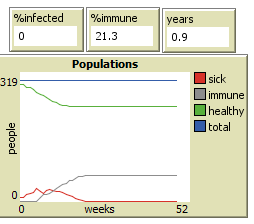

In [67]:
# replace FILE_NAME_2.2.2.png with an image of your visualization
# The images won't display unless they're in the same folder as this ipynb
# Be sure to run the cells to display the image

from IPython.display import Image
Image("virus_model_viz.png") 

#### 2.2.3 Agent-Based Model Interpretation: 

After running the simulation multiple times, describe how the results from the agent-based simulation can be interpreted, being sure to reference the output in the visualization above. What insights can be gained from this simulation? What limitations does this simulation have? [#modeling] (<100 words)

These results show that coronavirus will infect around 21.7% of people (factoring in dead people), and will continue to around 20 weeks before dying out. This actually seems like a reasonable estimation, but I don't think it is for the right reasons. The things stopping coronavirus are quarantines and countermeasures. without those we will see much more infected people. The model does not seem to be able to have a high enough infection rate to accurately model the disease. There are still many real-world limitations to the model.

#### 2.2.4 Simulation Comparison: 

Compare and contrast the numerical simulation you wrote in Python with the NetLogo virus simulation. Based on all of the above analysis, what are the biggest differences between these simulations, and which one is a more realistic representation of nature? Why? Be sure to address whether these are stochastic or deterministic simulations and to consider the results. [#modeling] (<100 words)

The SEIR simulation got a much more pessimistic outcome than the agent-based model. While I believe Netlogo has closer results to what will actually happen, it has them for the wrong reasons. In this case, agent-based modelling is practically almost identical to the SIR model, since we can derive the same equations from it, only with stochastic elements (SIR and SEIR are deterministic) and slightly different input parameters. For example, the rate of people infected is equal to the number of infected people times number of susceptible people times infectiousness in the Netlogo model too. This means the SEIR model is clearer (no unnessecary levels of complexity) and closer to the real world (because it has the exposed number).

#### 2.2.5 Optional Super Challenge:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). One option: a tree graph can be useful in modeling person-to-person interactions. Another option: turtles. [#algorithms, #modeling]

In [71]:
!pip install mesa

  Created wheel for mesa: filename=Mesa-0.8.6-py3-none-any.whl size=646982 sha256=3c927f6622e6a34c1783ca913ffa5df11a079a44e051ed66c414a09bd914d507
  Stored in directory: c:\users\peleg\appdata\local\pip\cache\wheels\61\61\c6\3967f51ac4c46367d274d7cad1f2eba593877e19555094f422
Successfully built mesa


In [1]:
from mesa.time import RandomActivation
from mesa import Agent, Model

# This model is an agent-based model that simulates the SIR model with some stochasticity, very similarly to NetLogo
# the skeleton of the code was copied from https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html
# The specifics to modelling disease were written by me

#Defines a person in the model
class MoneyAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        initial_infected = 0.01 #amount of people initially infected
        if random.random() < initial_infected: 
            self.infected = 1 #infected
        else:
            self.infected = 0 #susceptible

    def step(self):
        recovery_chance = 0.015265 # same as the SIR model parameter
        infection_chance = 0.050065 # same as the SIR model parameter
        if self.infected == 1:
            other_agent = self.random.choice(self.model.schedule.agents) #each day an agent has a chance to infect one other agent
            if other_agent.infected == 0 and random.random() < infection_chance:
                other_agent.infected = 1
            if self.random.random() < recovery_chance:
                self.infected = 2 #recovered

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

# Initialize the model for 1000 agents
model = MoneyModel(1000)
#record number of infected, susceptible, and recovered people
infected = []
susceptible = []
recovered = []
#run the model
for i in range(100):
    model.step() #perform a step (day) of the model
    #count the number of infected, susceptible and recovered people, and record them
    infected_people = 0
    susceptible_people = 0
    recovered_people = 0
    for a in model.schedule.agents:
        if a.infected == 0:
            susceptible_people += 1
        elif a.infected == 1:
            infected_people += 1
        else:
            recovered_people += 1
    infected.append(infected_people)
    susceptible.append(susceptible_people)
    recovered.append(recovered_people)
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

# plot the results in a line graph
plt.plot(range(100), susceptible)
plt.plot(range(100), infected)
plt.plot(range(100), recovered)
plt.legend(("susceptible", "infected", "recovered"))
plt.xlabel("day")
plt.ylabel("fraction of population")
plt.title("Projected spread of COVID-19")

NameError: name 'random' is not defined

## REFLECTION

Describe how you obtained the knowledge to complete the assignment, being sure to include attributions to specific individuals or groups who helped you and how they helped. You should elaborate on any strategies you used to assess your own understanding of the material. [#selfawareness] (<100 words)

I researched most of it myself or used my knowledge from class. The code for the decision tree is mostly from analytics vidya but some parts (data importing and splitting to train and test) are mine, and I also copied some code for the agent-based simulation from the mesa tutorial. The rest of the code is original. I don't think I got any important ideas or information from my proffessors and classmates, since I could do things myself

## You're done! 

You must upload TWO files:


1. A **zipped folder** containing the .ipynb file and any other relevant files for running the notebook.


2. A **PDF** of your entire assignment. This is to be submitted as a separate file, NOT simply inside the zipped folder. Run all cells before converting the notebook to a PDF, and triple check to make sure that the PDF is complete with all components (code, writing, images) visible and properly formatted. Email attachments will not be accepted. If you're having difficulty converting your notebook to a PDF, please try the tips available in [this guide](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit?usp=sharing).

## References

1. Ying Liu, Albert A Gayle, Annelies Wilder-Smith, Joacim Rocklöv, The reproductive number of COVID-19 is higher compared to SARS coronavirus, Journal of Travel Medicine, , taaa021, https://doi.org/10.1093/jtm/taaa021
2. Wu, J. T., Leung, K., & Leung, G. M. (2020). Nowcasting and forecasting the potential domestic and international spread of the 2019-nCoV outbreak originating in Wuhan, China: a modelling study. The Lancet, 395(10225), 689–697. doi: 10.1016/s0140-6736(20)30260-9
3. Dorigatti, I., Okell, L., Cori, A., Imai, N., Baguelin, M., Bhatia, S., ... & FitzJohn, R. (2020). Report 4: severity of 2019-novel coronavirus (nCoV).